In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dev_df = pd.read_csv('../data/train.csv')
del dev_df["Id"]
dev_df = dev_df.drop_duplicates().copy()
dev_df["Prediction"] = dev_df["Prediction"].apply(lambda x: 1 if x == "s" else 0)

train_df, val_df = train_test_split(dev_df, test_size=0.2, stratify=dev_df["Prediction"])
train_df, val_df = train_df.reset_index(drop=True).copy(), val_df.reset_index(drop=True).copy()

test_df = pd.read_csv('../data/test.csv')

In [3]:
train_df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0,123.994,0.638,74.153,23.065,-999.000,-999.000,-999.000,2.811,23.065,...,-0.949,158.273,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,0.000
1,0,-999.000,102.167,89.349,4.295,-999.000,-999.000,-999.000,2.143,4.295,...,-2.029,58.808,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,0.000
2,0,89.372,59.429,47.849,28.106,-999.000,-999.000,-999.000,2.753,28.106,...,0.293,112.183,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,0.000
3,1,114.647,23.511,83.907,2.476,-999.000,-999.000,-999.000,2.839,2.476,...,-0.323,170.087,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,0.000
4,1,121.253,23.854,67.417,445.028,0.489,91.144,0.583,0.570,35.710,...,-0.650,661.757,3,390.113,0.557,2.434,71.329,1.046,2.5,495.096


In [4]:
train_df.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,...,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.342670,-49.013006,49.269288,81.212396,57.875538,-708.757359,-601.616167,-709.69440,2.374149,18.944017,...,-0.00928,209.771275,0.979180,-348.292404,-399.186407,-399.192701,-692.731628,-709.458569,-709.454632,73.051385
std,0.474603,406.411756,35.346589,40.928405,63.724860,454.325849,657.754342,452.86221,0.782656,22.528771,...,1.81247,126.591570,0.977641,532.916471,489.325607,489.320541,479.716755,453.228577,453.234474,98.015296
min,0.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.00000,0.208000,0.000000,...,-3.14200,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,0.000000,78.195500,19.255000,59.445000,14.062750,-999.000000,-999.000000,-999.00000,1.812000,2.830000,...,-1.57700,122.901000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,0.000000,105.080000,46.602500,73.762000,38.425000,-999.000000,-999.000000,-999.00000,2.493000,12.301000,...,-0.02200,179.662000,1.000000,38.958500,-1.869000,-2.094000,-999.000000,-999.000000,-999.000000,40.539000
75%,1.000000,130.648250,73.655000,92.241250,79.077500,0.487000,83.425500,-4.62100,2.962000,27.593000,...,1.56100,263.435250,2.000000,75.297000,0.435000,0.502000,33.708000,-2.464750,-2.280000,109.881000
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4543.913000,16.69000,5.684000,2834.999000,...,3.14200,2003.976000,3.000000,1120.573000,4.492000,3.141000,721.456000,4.500000,3.142000,1633.433000


<AxesSubplot:>

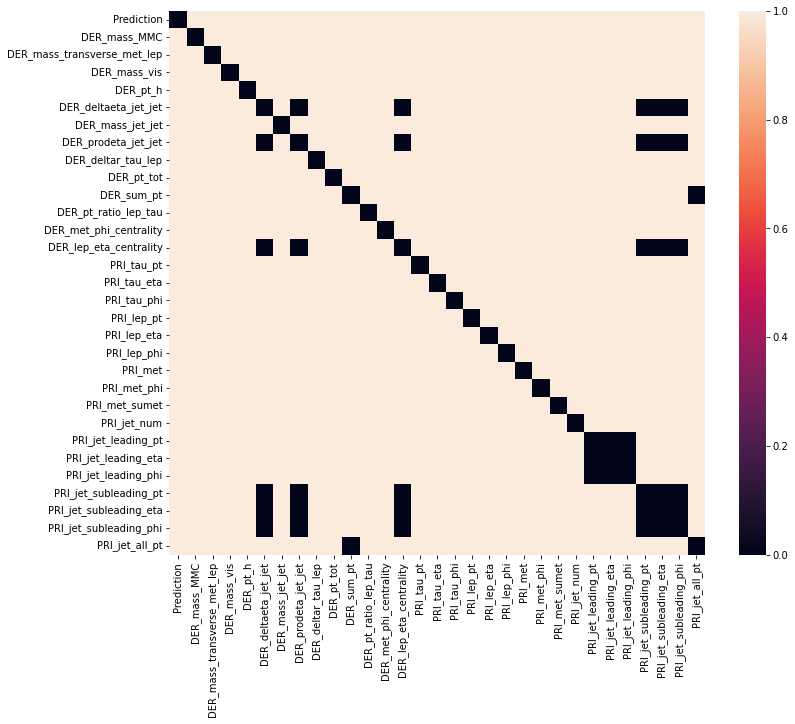

In [5]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

In [6]:
useless = [
    'DER_deltaeta_jet_jet', 
    'DER_prodeta_jet_jet',
    'DER_lep_eta_centrality', 
    'PRI_jet_subleading_eta',
    'PRI_jet_subleading_phi', 
    'PRI_jet_leading_eta', 
    'PRI_jet_leading_phi', 
    'DER_sum_pt', 
]

for col in useless:
    del train_df[col]

<AxesSubplot:>

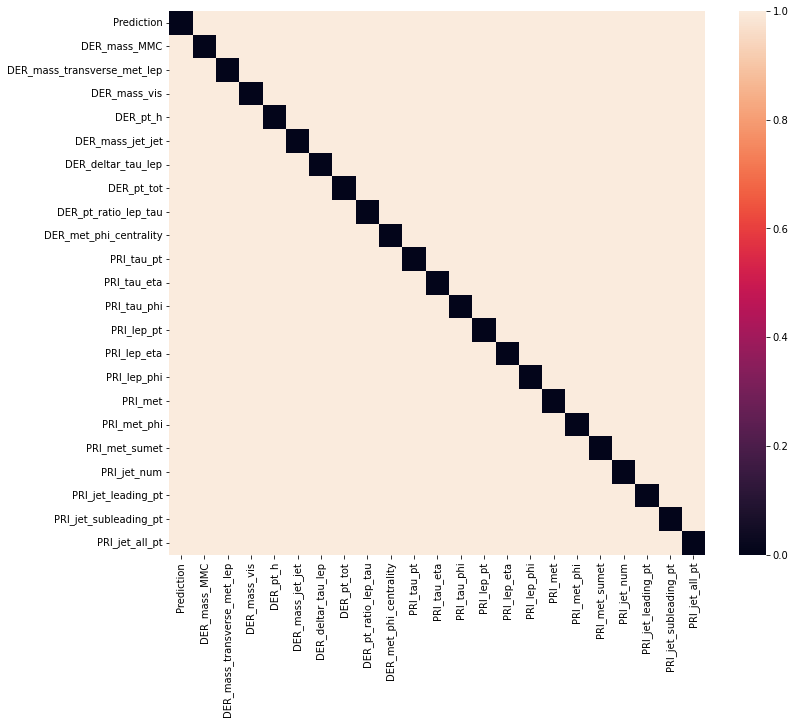

In [7]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

<AxesSubplot:>

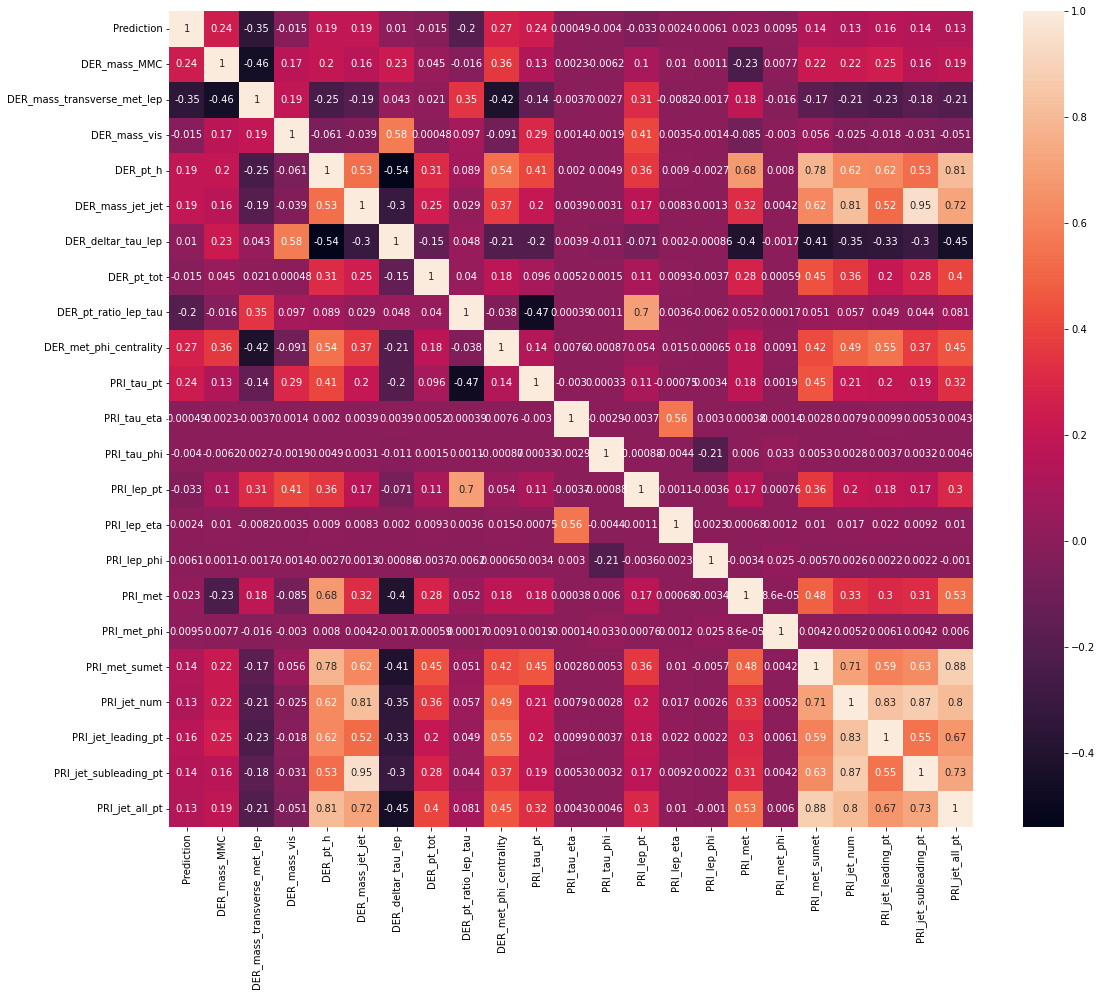

In [8]:
plt.figure(figsize=(18,15))
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)

In [9]:
import numpy as np

In [10]:
train_df[train_df < -998.000] = np.nan
train_df.fillna(train_df.mean(), inplace=True)

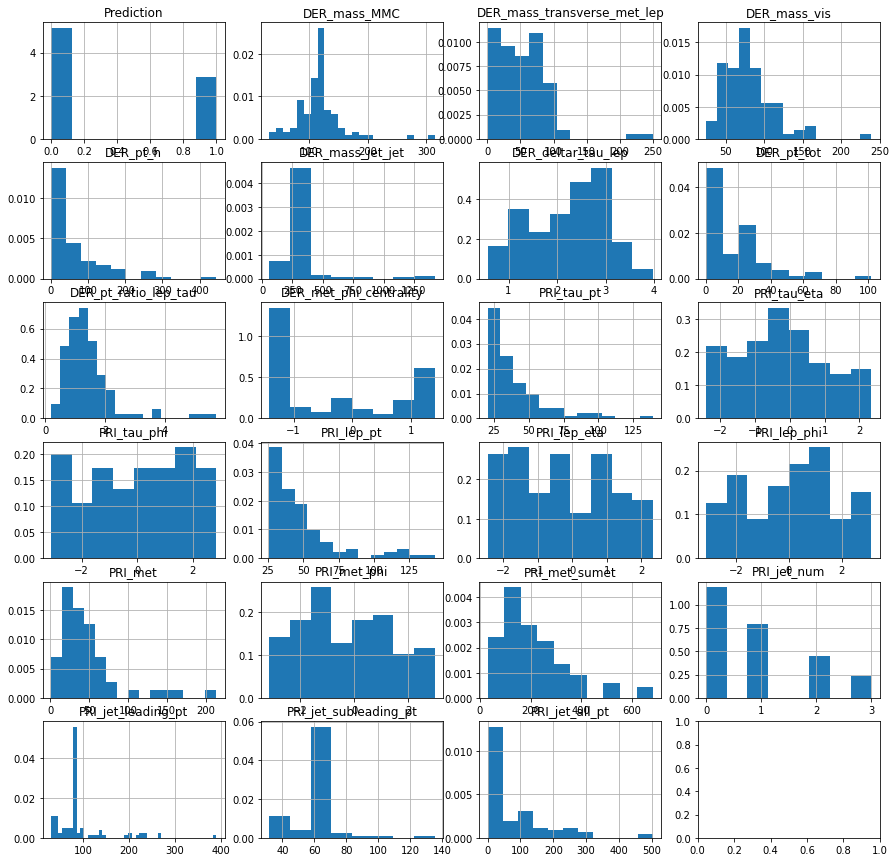

In [11]:
fig, axs = plt.subplots(6, 4, figsize=(15,15))
columns = train_df.columns
for i in range(23):
    train_df.loc[:100, columns[i]].hist(
        bins="auto", 
        density=True, 
        ax=axs[i // 4, i % 4], 
    )
    axs[i // 4, i % 4].set_title(columns[i])

donc en gros, on a enlever les truc trop corélé et après

pour vendredi, faire les code des fonctions de base, regarder pour l'overlafe et clara fait la cross validation pour avoir l'hyperparameter lambda



In [12]:
from implementations import least_squares, least_squares_GD, compute_loss, ridge_regression
from course_functions import build_poly

In [13]:
train_df

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_mass_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt
0,0,123.99400,0.638,74.153,23.065,372.06917,2.811,23.065,0.576,0.942,...,26.361,-0.693,-0.925,26.611,-0.949,158.273,0,84.763057,57.699058,0.000
1,0,121.91538,102.167,89.349,4.295,372.06917,2.143,4.295,1.434,-1.402,...,50.691,-2.130,0.445,57.663,-2.029,58.808,0,84.763057,57.699058,0.000
2,0,89.37200,59.429,47.849,28.106,372.06917,2.753,28.106,1.289,-0.018,...,27.482,-0.621,-3.046,32.444,0.293,112.183,0,84.763057,57.699058,0.000
3,1,114.64700,23.511,83.907,2.476,372.06917,2.839,2.476,0.704,-1.400,...,35.584,1.526,0.643,17.975,-0.323,170.087,0,84.763057,57.699058,0.000
4,1,121.25300,23.854,67.417,445.028,91.14400,0.570,35.710,1.198,1.360,...,128.137,-0.164,-0.505,211.472,-0.650,661.757,3,390.113000,71.329000,495.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,89.96100,40.035,67.576,2.566,372.06917,3.163,2.566,1.456,-1.367,...,30.382,1.641,-1.435,13.992,2.190,111.379,0,84.763057,57.699058,0.000
199996,0,111.41400,79.250,71.402,41.726,372.06917,2.729,1.460,1.496,-0.648,...,31.107,2.271,-2.998,51.388,-0.123,141.795,1,41.681000,57.699058,41.681
199997,0,119.62600,91.624,72.330,0.248,372.06917,2.721,0.248,2.439,-1.303,...,57.463,-2.455,1.001,37.154,-2.402,108.643,0,84.763057,57.699058,0.000
199998,1,121.91538,92.530,87.951,33.843,710.52500,1.793,96.481,0.648,-1.345,...,38.050,-1.232,-1.741,58.030,1.049,206.132,2,96.941000,31.192000,128.133


In [14]:
train_df = pd.concat([train_df, pd.get_dummies(train_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del train_df["PRI_jet_num"]
val_df = pd.concat([val_df, pd.get_dummies(val_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del val_df["PRI_jet_num"]
test_df = pd.concat([test_df, pd.get_dummies(test_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del test_df["PRI_jet_num"]

In [15]:
y_column = "Prediction"
X_columns = [col for col in train_df.columns if col != y_column]

In [16]:
X_train, y_train = train_df[X_columns].values, train_df[y_column].values
X_val, y_val = val_df[X_columns].values, val_df[y_column].values

**PCA and K-clustering**

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [18]:
sc = StandardScaler()

X_train_pca = sc.fit_transform(X_train)
X_val_pca = sc.transform(X_val)

In [19]:

pca = PCA(n_components = 2)
 
X_train_pca = pca.fit_transform(X_train_pca)
X_val_pca = pca.transform(X_val_pca)
 
explained_variance = pca.explained_variance_ratio_

In [27]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier.predict(X_val_pca)

In [29]:
cm = confusion_matrix(y_val, y_pred)

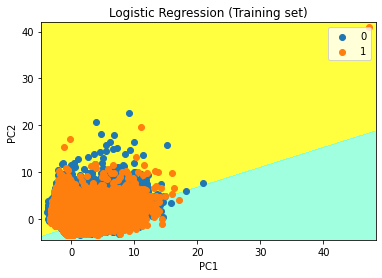

In [34]:
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


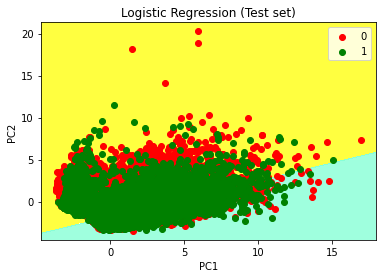

In [31]:
X_set, y_set = X_val_pca, y_val
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

***Ridge regression*** 

In [30]:
loss, w_pure = ridge_regression(y_train, X_train, lambda_=0.)
y_pred = (X_train @ w_pure).reshape(-1, 1)
y_pred = np.concatenate([1 - y_pred, y_pred], axis=1)
loss_te = compute_loss(y_val, X_val, w_pure)
print(loss, loss_te)
#plot_roc(y_val, y_pred, figsize=(8,8))

0.08513077591982124 0.11137760106182129


In [21]:
X_train = np.concatenate([X_train, np.ones(X_train.shape[0]).reshape(-1, 1)], axis=1)
X_val = np.concatenate([X_val, np.ones(X_val.shape[0]).reshape(-1, 1)], axis=1)

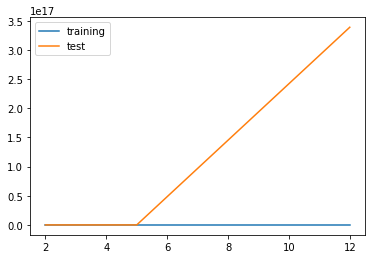

In [22]:
degrees = [2, 3, 4, 5, 12] #more than five = overfitting 
lambda_ = 0.1 # cross-validation à faire !!  
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train, degree)
    X_val_poly = build_poly(X_val, degree)
    loss, w_tr = ridge_regression(y_train, X_train_poly, lambda_)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()

In [29]:
losses_tr[0], losses_te[0]

(0.08216194538637113, 20.340714996083264)

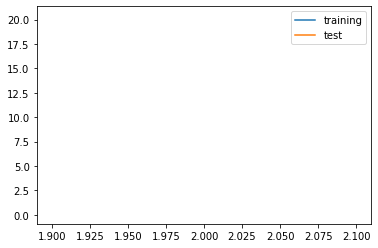

In [27]:
plt.plot(degrees[0], losses_tr[0], degrees[0], losses_te[0])
plt.legend(['training', 'test'])
plt.show()

there is some overfitting, so we can take the 2 or the 4th degree to test the error 

**Least Squares**

In [22]:
loss_tr, W = least_squares(y_train, X_train)
loss_te = compute_loss(y_val, X_val, W)
print(loss_tr, loss_te)

0.08490240340159771 0.08541374751391657


In [50]:
loss_tr, W = least_squares(y_train, X_train)
loss_te = compute_loss(y_val, X_val, W)
print(loss_tr, loss_te)

0.08501879156121188 0.08495198611965159


In [39]:
degrees = [0, 1, 2, 3, 4, 5, 12] #more than five = overfitting 
lambda_ = 0.1
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train, degree)
    X_val_poly = build_poly(X_val, degree)
    loss, w_tr = least_squares(y_train, X_train_poly)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()

LinAlgError: Singular matrix

**Least Squares Gradient descente**

In [46]:
np.shape(X_train)[1]

25

In [48]:
w_initial = np.zeros(np.shape(X_train)[1])
print(w_initial)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [51]:
w_initial = np.zeros(np.shape(X_train)[1])  
max_iters = 50
gamma = 0.7 #il faudra faire une cross-validation ! 

L_tr, w = least_squares_GD(y_train, X_train, w_initial, max_iters, gamma)
loss_te = compute_loss(y_val, X_val, W)
print(loss_tr, loss_te)

Gradient Descent(0/49): loss=0.171335, w0=20.513616235, w1=7.676442595500001
Gradient Descent(1/49): loss=29732247941.051704, w0=12142808.418697067, w1=-7445265.008277456
Gradient Descent(2/49): loss=4.299391109770519e+22, w0=-19660418170193.836, w1=8771524207403.748
Gradient Descent(3/49): loss=6.289992995339491e+34, w0=2.4443544698935742e+19, w1=-1.0600845074365704e+19
Gradient Descent(4/49): loss=9.203203785299805e+46, w0=-2.9655767335703967e+25, w1=1.2823009215801995e+25
Gradient Descent(5/49): loss=1.3465685423490663e+59, w0=3.5883844622272133e+31, w1=-1.5510920117563813e+31
Gradient Descent(6/49): loss=1.970234400632705e+71, w0=-4.340702860026338e+37, w1=1.8762154975379542e+37
Gradient Descent(7/49): loss=2.8827523235714e+83, w0=5.250572238098312e+43, w1=-2.2694859108941046e+43
Gradient Descent(8/49): loss=4.217904710430798e+95, w0=-6.351138274559612e+49, w1=2.74518877323402e+49
Gradient Descent(9/49): loss=6.171435541238027e+107, w0=7.682389271127908e+55, w1=-3.3206028131218204e

TypeError: list indices must be integers or slices, not tuple

In [ ]:
degrees = [0, 1, 2, 3, 4, 5] #more than five = overfitting 
max_iters = 50
gamma = 0.7 #il faudra faire une cross-validation ! 
w_initial = np.zeros(np.shape(X_train)[1])
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train, degree)
    X_val_poly = build_poly(X_val, degree)
    L_tr, w = least_squares_GD(y_train, X_train_poly, w_initial, max_iters, gamma)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()